<a href="https://colab.research.google.com/github/MauroTalamantes/Introducci-n_ProcesamientoImagenes_ScikitImage/blob/main/Introducci%C3%B3n_a_Procesamiento_de_im%C3%A1genes_y_scikit_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
#Clonar el repositorio y cambiar la carpeta para traer las imagenes con las que se trabajó
!git clone https://github.com/MauroTalamantes/Introducci-n_ProcesamientoImagenes_ScikitImage
%cd Introducci-n_ProcesamientoImagenes_ScikitImage/

Cloning into 'Introducci-n_ProcesamientoImagenes_ScikitImage'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 31 (delta 5), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (31/31), 7.35 MiB | 9.24 MiB/s, done.
Resolving deltas: 100% (5/5), done.
/content/Introducci-n_ProcesamientoImagenes_ScikitImage/Introducci-n_ProcesamientoImagenes_ScikitImage


#Introducción al procesamiento de imágenes y scikit-image
El procesamiento de imágenes es un método para realizar operaciones con imágenes con el fin de mejorarlas o extraer información útil, analizarla y tomar decisiones. Al cuantificar la información de las imágenes, podemos realizar cálculos. El procesamiento de imágenes es un subconjunto de la visión artificial.

### Aplicaciones
- Análisis de imágenes médicas
- Inteligencia artificial
- Restauración y mejora de imágenes
- Computación geoespacial
- Vigilancia
- Visión robótica
- Seguridad automotriz
- Etc...

### Objetivos
Extración de datos, transformación y analisis de imágenes con NumPy y Scikit-image. Conversión de imágenes RGB a escala de grises, obtención de datos de ellas, histogramas con información muy útil y separación de objetos del fondo. Este es el resumen de la clase.

In [ ]:
#Importamos librerias
import numpy as np
import matplotlib.pyplot as plt

## ¿Una imagen?
Una imagen digital es una matriz de píxeles cuadrados (elementos de imagen) dispuestos en columnas y filas: en otras palabras, una matriz bidimensional.

Estos píxeles contienen información sobre el color y la intensidad. Aquí hay un ejemplo de la matriz para una imagen 2D en escala de grises. Podemos ver que la primera imagen está pixelada. Los números que aparecen sobre la siguiente imagen, junto a la primera, corresponden a la intensidad de cada píxel. Por lo tanto, una imagen puede considerarse una matriz de intensidades.

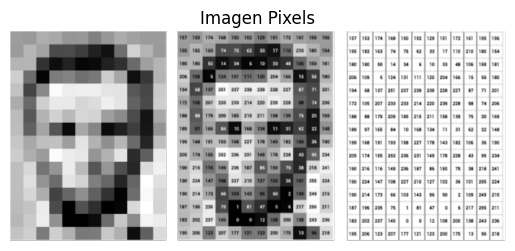

In [64]:
import matplotlib.image as mpimg

# Leer la imagen
img = mpimg.imread('dataset/pixels.png')

# Mostrarla
plt.imshow(img)
plt.title('Imagen Pixels')
plt.axis('off')
plt.show()

## Imágenes con scikit-image
- Objetivo
  - Visualización: Objetos menos visibles
  - Nitidez y restauración de imágenes: Una mejor imagen
  - Recuperación de imágenes: Búsqueda de la imagen de interés
  - Medición de patrones: Mide varios objetos
  - Reconocimiento de imágenes: Distingue objetos en una imagen
- Scikit-Image
  - Fácil de usar
  - Utiliza el aprendizaje automático
  - Algoritmo complejo y listo para usar

## Imágenes en scikit-image
Scikit-image proporciona imágenes para pruebas en un módulo llamado data. Si queremos cargar una imagen a color de un café, podemos hacerlo importando datos de skimage. Y luego, desde data, llamando al método coffee.

In [ ]:
#Función para visualizar imagenes
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

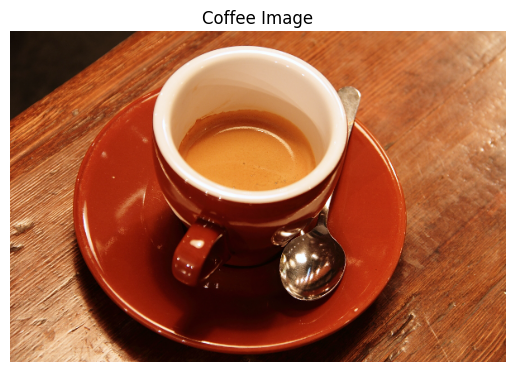

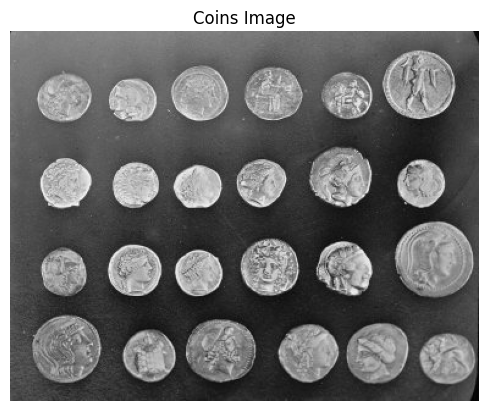

In [ ]:
#Obtenemos y mostramos imagenes desde skimage
from skimage import data

coffee_image = data.coffee()
coins_image = data.coins()

show_image(coffee_image, 'Coffee Image')
show_image(coins_image, 'Coins Image')

Conocer las dimensiones de una imagen (.shape) es útil dependiendo de lo que queramos hacer con ella. Algunas razones por las que interesa saberlo son:
  - Si se está entrenando un modelo de Machine Learning (por ejemplo, una red neuronal), necesitamos que todas las imágenes tengan el mismo tamaño.
  ```
  from skimage.transform import resize
  imagen_escalda = resize(coffee_image, (256, 256))
  ```
  - Verificar el tipo de imagen, si es gris o a colores. Útil para decidir si se aplican filtros en todos los canales o solo uno.
    - Escala de grises → 2D (solo alto y ancho)
    - A color → 3D (alto, ancho, canales)

  ```
  coffee_image.shape
  coins_image.shape
  ```
  - Si se está procesando la imagen manualmente (ej. cambiar brillo, invertir colores, aplicar filtros), se necesita saber el tamaño para recorrerla con bucles o usar NumPy.

  ```
  height, width = coins_image.shape
  for y in range(height):
      for x in range(width):
          # procesar cada píxel...
  ```
  - Si usamos una imagen RGB a una función que espera escala de grises (o viceversa), puede lanzar error o mostrar mal la imagen.

In [ ]:
from skimage.transform import resize
imagen_escalda=resize(coffee_image,(256,256))

print(f'Dimensiones y canales de coffe_image:\n{coffee_image.shape}')
print(f'Dimensiones de coins_image:\n{coins_image.shape}')
print(f'Dimensiones y canales de imagen_escalda:\n{imagen_escalda.shape}')


Dimensiones y canales de coffe_image:
(400, 600, 3)
Dimensiones de coins_image:
(303, 384)
Dimensiones y canales de imagen_escalda:
(256, 256, 3)


#RGB a Escala de Grises
En el siguiente ejemplo se carga una imagen desde el modulo data de scikit-image y se convierte a grises. Posteriormente se comparan las salidas.

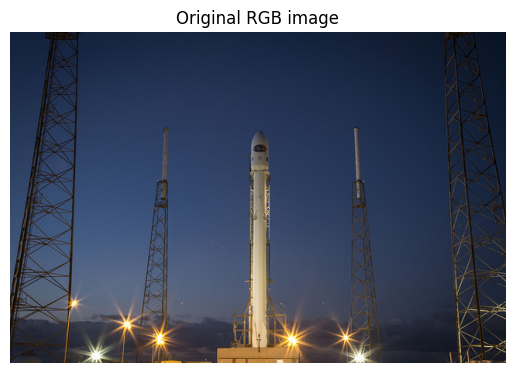

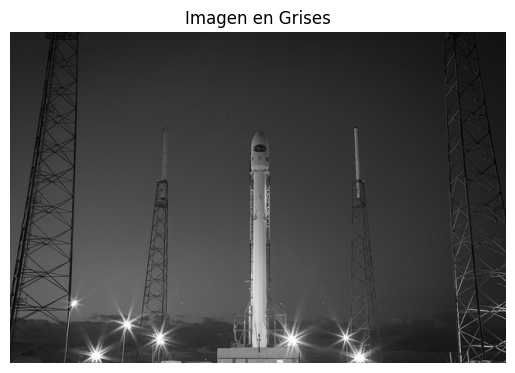

In [ ]:
from skimage import data, color

# Cargar imagen de cohete
rocket = data.rocket()

# Convetir a grises
gray_scaled_rocket = color.rgb2gray(rocket)

# Mostrar imagen orignal
show_image(rocket, 'Original RGB image');

# Mostrar imagen en grises
show_image(gray_scaled_rocket, 'Imagen en Grises')

#NumPy para imagenes

## Imagenes como NdArrays
Imaginemos que tenemos una imagen y la cargamos usando la función imread() de matplotlib. Si verificamos su tipo con la función type() de Python, podemos ver que es un objeto ndarray de NumPy.

Dado que las imágenes se pueden representar mediante arreglos multidimensionales de NumPy (o "NdArrays"), los métodos de NumPy para manipular arreglos funcionan bien con estas imágenes.

In [68]:
# Loading the image using Matplotlib
madrid_image = plt.imread('dataset/madrid.PNG')
type(madrid_image)

numpy.ndarray

## NumPy
Una imagen en color es un array NumPy con una tercera dimensión para los canales de color. Podemos segmentar el array multidimensional y obtener estos canales por separado.

In [70]:
#Obtención de los valores de rojo de la imagen
red = image[:, :, 0]
# Obtención de los valores de verdes de la imagen
green = image[:, :, 1]
# Obtención de los valores de azules de la imagen
blue = image[:, :, 2]

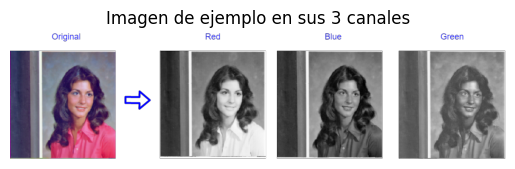

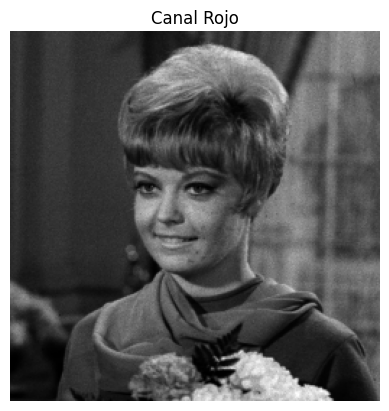

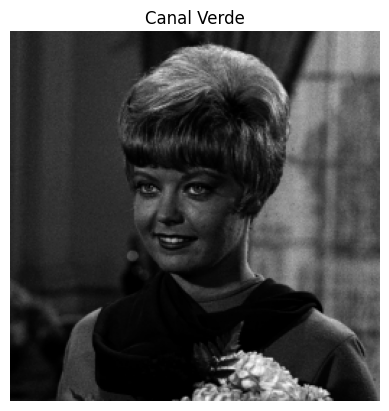

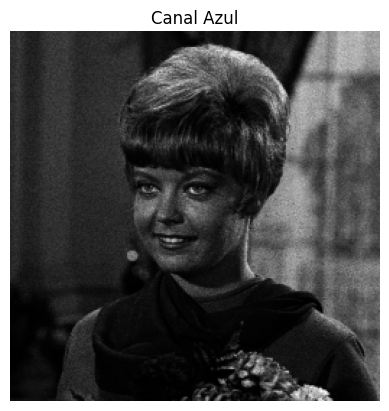

In [76]:
color_img = plt.imread('dataset/color.png')
show_image(color_img, 'Imagen de ejemplo en sus 3 canales')

show_image(red, 'Canal Rojo')
show_image(green, 'Canal Verde')
show_image(blue, 'Canal Azul')

### Volteando imagenes
Se tiene una imagen volteada y ahora se quiere enderezar la imagen volteándola.
Usando los métodos de NumPy se voltea la imagen horizontal y verticalmente. Luego, se muestra la imagen corregida con la función `show_image()`.

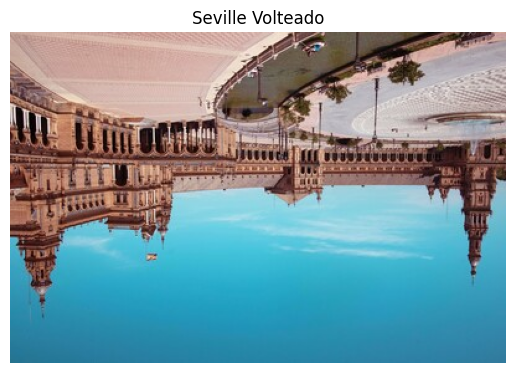

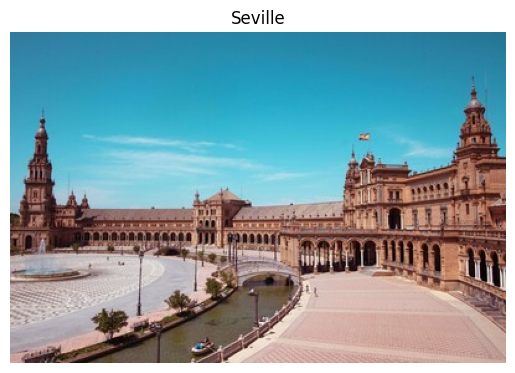

In [ ]:
flipped_seville = plt.imread('./dataset/sevilleup.jpg')

# Flip the image vertically
seville_vertical_flip = np.flipud(flipped_seville)

# Flip the previous image horizontally
seville_horizontal_flip = np.fliplr(seville_vertical_flip)

# Show the resulting image
show_image(flipped_seville, 'Seville Volteado')
show_image(seville_horizontal_flip, 'Seville')

#Histogramas
Extraer información de las imágenes es fundamental para su mejora. De esta forma, puede equilibrar el rojo y el azul para que la imagen se vea más fría o más cálida.

Utilizará hist() para mostrar las 256 intensidades diferentes del color rojo y ravel() para convertir estos valores de color en un array de una sola dimensión.

Se analizará la cantidad de rojo en la imagen. Para ello, se calculará el histograma del canal rojo de la imagen que se muestra a continuación:

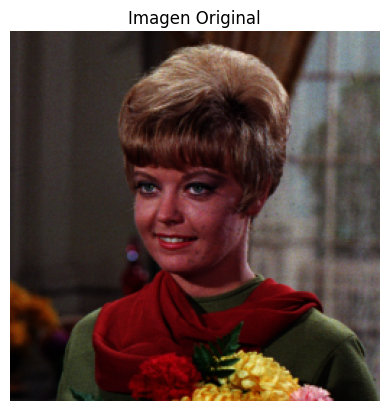

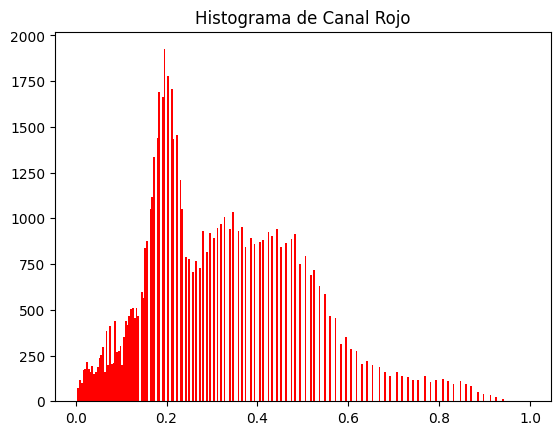

In [ ]:
image = plt.imread('./dataset/portrait.png')

show_image(image, 'Imagen Original')

# Obtener el canal rojo
red_channel = image[:, :, 0]

# Plotear el histograma rojo con contenedores en un rango de 256
plt.hist(red_channel.ravel(), bins=256, color='red');

# Cambiar el titulo
plt.title('Histograma de Canal Rojo');

Con este histograma, observamos que la imagen es bastante rojiza, lo que significa que transmite una sensación de calidez. Esto se debe a su amplia distribución de píxeles rojos brillantes, de 0 a aproximadamente 150.

En palabras mas simples, un histograma de imagen es una distribución de valores en escala de grises que muestra la frecuencia de aparición de cada valor. Para una imagen de 1024 × 1024 × 8 bits, la abscisa oscila entre 0 y 255; el número total de píxeles es de 1024 × 1024.

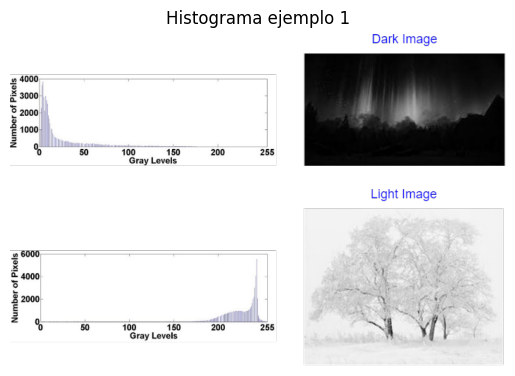

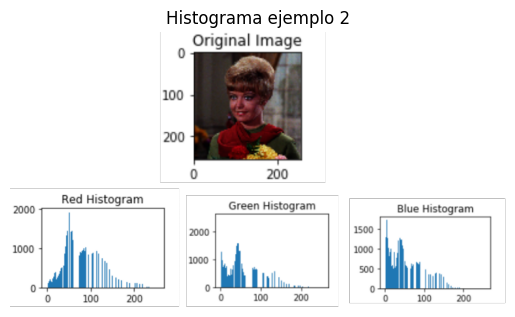

In [78]:
histogram1 = plt.imread('./dataset/histogram.png')
histogram2 = plt.imread('./dataset/histogram2.png')

show_image(histogram1, 'Histograma ejemplo 1')
show_image(histogram2, 'Histograma ejemplo 2')

### Aplicaciones de los histogramas
- Análisis
- Umbralización
- Brillo y contraste
- Ecualización de una imagen

### Histogramas en Matplotlib
Matplotlib cuenta con un método de histograma. Este utiliza un array de entrada (frecuencia) y bins como parámetros. Los elementos sucesivos del array bin actúan como límite de cada bin. Obtenemos el canal de color rojo de la imagen al cortarla. Luego, usamos la función histograma. Usamos ravel para obtener un array continuo y aplanado de los valores de color de la imagen, en este caso el rojo. Y pasamos este ravel y los bins como parámetros. Establecemos bins en 256 porque mostraremos el número de píxeles para cada valor de píxel, es decir, de 0 a 255. Esto significa que se necesitan 256 valores para mostrar el histograma.

(array([  75.,  117.,  101.,  172.,  177.,  213.,  175.,  159.,  194.,
         150.,  159.,  188.,  238.,  253.,  298.,  159.,  382.,  199.,
         410.,  204.,  207.,  437.,  268.,  277.,  304.,  200.,  349.,
         441.,  416.,  467.,  502.,  511.,  457.,  509.,  465.,    0.,
         597.,  567.,  838.,  876.,    0., 1049., 1119., 1335.,    0.,
        1437., 1691.,    0., 1663., 1924.,    0., 1779.,    0., 1708.,
        1434.,    0., 1458.,    0., 1210., 1050.,    0.,  791.,    0.,
         778.,    0.,  706.,    0.,  765.,    0.,  726.,    0.,  929.,
           0.,  814.,    0.,  922.,    0.,  890.,    0.,  945.,    0.,
         971.,    0., 1005.,    0.,    0.,  940.,    0., 1032.,    0.,
           0.,  933.,    0.,  955.,    0.,  845.,    0.,    0.,  893.,
           0.,  862.,    0.,    0.,  871.,    0.,  882.,    0.,    0.,
         925.,    0.,  905.,    0.,    0.,  941.,    0.,  842.,    0.,
           0.,  864.,    0.,    0.,  886.,    0.,  917.,    0.,    0.,
      

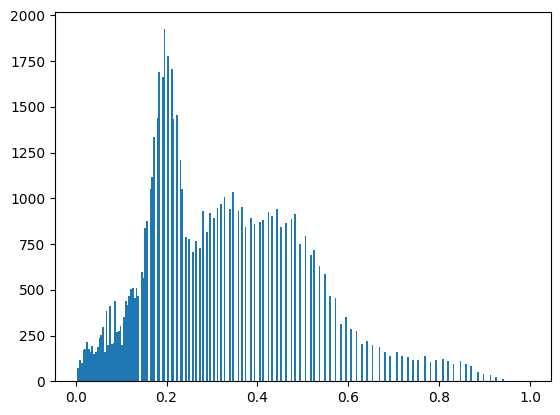

In [79]:
# Red color of the image
red = image[:, :, 0]
# Obtain the red histogram
plt.hist(red.ravel(), bins=256)

### Visualización de histogramas con Matplotlib
Para visualizarlos, una vez obtenido el color azul de la imagen y usando el método hist, pasando el array y los bins para incluirlos en el gráfico, se traza con plt.show().

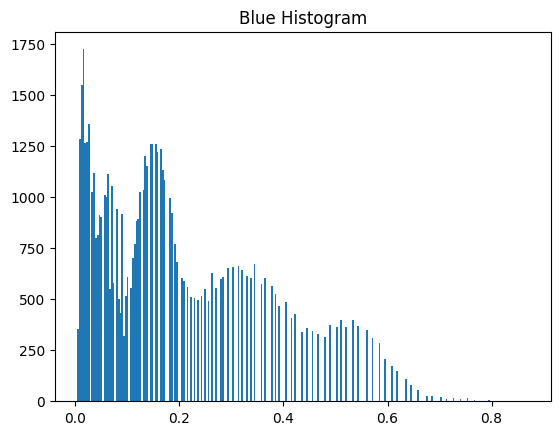

In [81]:
blue = image[:, :, 2]
plt.hist(blue.ravel(), bins=256)
plt.title('Blue Histogram')
plt.show()

## Introducción a la umbralización

La umbralización se utiliza para dividir el fondo y el primer plano de las imágenes en escala de grises, convirtiéndolas básicamente en blanco y negro. Comparamos cada píxel con un valor de umbral determinado. Si el píxel es menor que ese valor, lo convertimos en blanco. Si es mayor, lo convertimos en negro.

La umbralización es el método más sencillo de segmentación de imágenes. Permite aislar elementos y se utiliza en la detección de objetos, el reconocimiento facial y otras aplicaciones.

Funciona mejor en imágenes en escala de grises de alto contraste. Para aplicar el umbral a las imágenes en color, primero debemos convertirlas a escala de grises.

- Umbralización:
  - Dividir una imagen en primer plano y fondo
  - Convertirla en blanco y negro
  - El método más sencillo de segmentación de imágenes

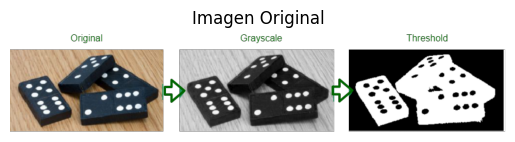

In [82]:
threshold_img = plt.imread('./dataset/threshold.png')

show_image(threshold_img, 'Imagen Original')

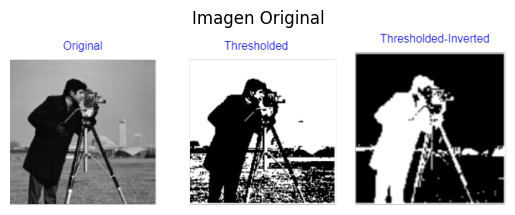

In [83]:
threshold_inv_img = plt.imread('./dataset/thresholding.png')

show_image(threshold_inv_img, 'Imagen Original')

### Aplicar umbralización global
Aplicar umbralización global
En este ejercicio, se transformará una fotografía a binario para separar el primer plano del fondo.

Para ello, se importarón los módulos necesarios, se cargó la imagen, obtuvimos el valor de umbral óptimo mediante `threshold_otsu()` y se aplicó a la imagen.

Se muestrá la imagen binarizada resultante al usar la función `show_image()`, explicada anteriormente.

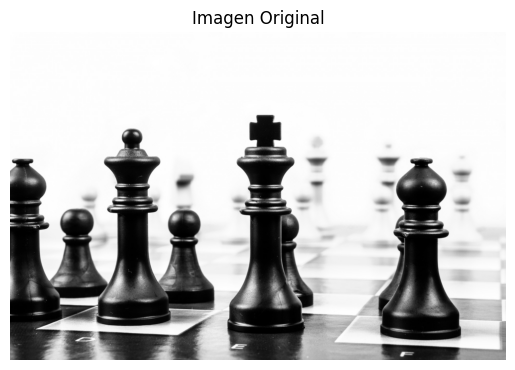

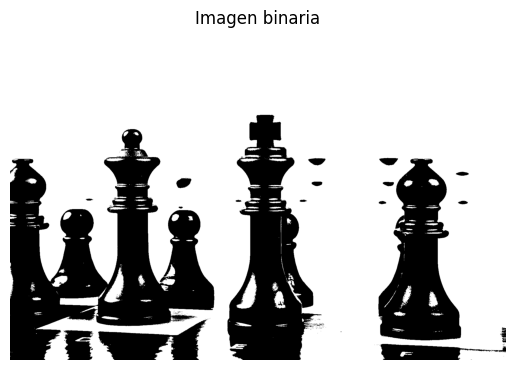

In [ ]:
from skimage.filters import threshold_otsu

chess_pieces_image = plt.imread('./dataset/bw.jpg')

# Convertir la imagen en escala de grises usando rgb2gray
chess_pieces_image_gray = color.rgb2gray(chess_pieces_image)

# Obtener el valor umbral óptimo con otsu
thresh = threshold_otsu(chess_pieces_image_gray)

# Aplicar umbralización a la imagen
binary = chess_pieces_image_gray > thresh

# Mostrar imagen
show_image(chess_pieces_image, 'Imagen Original')
show_image(binary, 'Imagen binaria')

### Cuando el fondo no es tan obvio
A veces, identificar el fondo no es tan obvio. Si el fondo de la imagen es relativamente uniforme, se puede usar un valor de umbral global, como practicamos antes, con `threshold_otsu()`. Sin embargo, si la iluminación de fondo es desigual, el umbral adaptativo `threshold_local()` (también conocido como umbralización local) puede producir mejores resultados.

En este ejercicio, comparará ambos tipos de métodos de umbralización (global y local) para encontrar la manera óptima de obtener la imagen binaria que necesitamos.

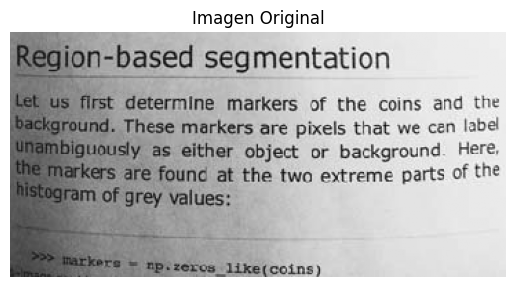

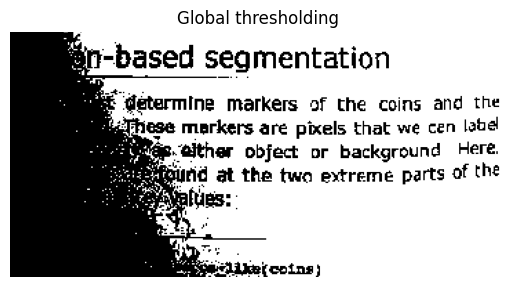

In [ ]:
from skimage import color, io
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt

# Leer la imagen
page_image = plt.imread('./dataset/text_page.png')

# Si tiene 4 canales (RGBA), ignoramos el canal alfa
if page_image.shape[-1] == 4:
    page_image = page_image[:, :, :3]  # Solo los 3 primeros canales (RGB)

# Convertir a escala de grises
page_image = color.rgb2gray(page_image)

# Umbral de Otsu
global_thresh = threshold_otsu(page_image)

# Imagen binaria
binary_global = page_image > global_thresh

# Mostrar
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

show_image(page_image, 'Imagen Original')
show_image(binary_global, 'Global thresholding')

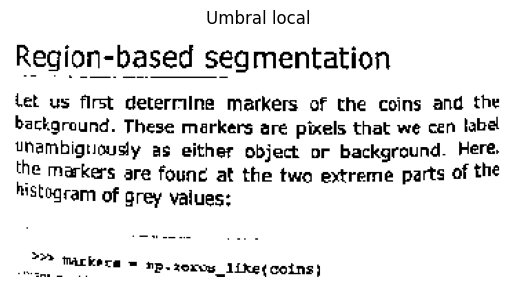

In [ ]:
from skimage.filters import threshold_local

# Cambiar el tamaño a 35
block_size = 35

# obtener el umbral local óptimo
local_thresh = threshold_local(page_image, block_size, offset=0.1)

# Obtenga la imagen binaria aplicando umbralización local
binary_local = page_image > local_thresh

# Mostrar la imagen binaria
show_image(binary_local, 'Umbral local')

### Probando otros métodos
No es un problema no saber que metodo de umbralización usar, de hecho, scikit-image nos proporciona una función para comprobar múltiples métodos y determinar por nosotros mismos cuál es la mejor opción. Devuelve una figura que compara los resultados de diferentes métodos de umbralización global.

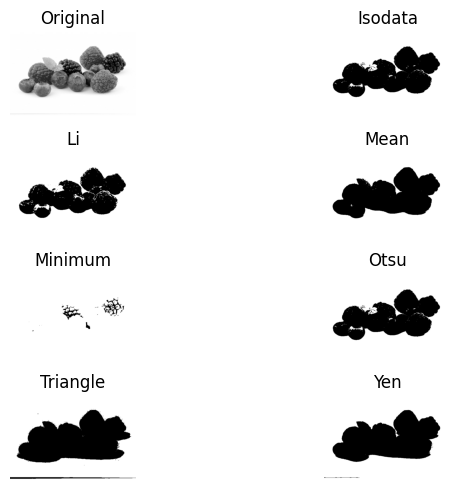

In [ ]:
from skimage.filters import try_all_threshold

fruits_image = plt.imread('./dataset/fruits-2.jpg')

# Turn the fruits_image to grayscale
grayscale = color.rgb2gray(fruits_image)

# Use the try all method on the resulting grayscale image
fig, ax = try_all_threshold(grayscale, verbose=False);

### Aplicar umbralización
Se decidirá qué tipo de umbralización es mejor para binarizar una imagen de herramientas de tejido y manualidades. Así, podrás ver con mayor claridad las formas de los objetos, desde corazones de papel hasta tijeras.

- ¿Qué tipo de umbralización utilizarías según las características de la imagen?
- ¿La iluminación y la intensidad del fondo son uniformes o desiguales?

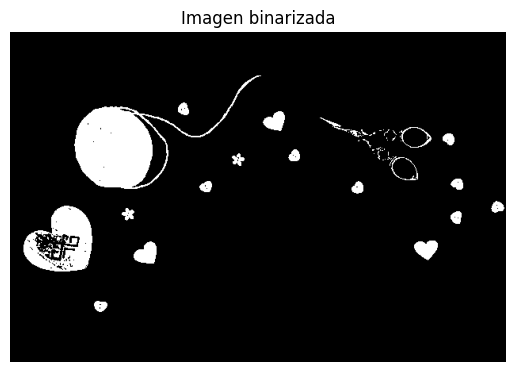

In [ ]:
tools_image = plt.imread('./dataset/shapes52.jpg')

# Convertir a grises
gray_tools_image = color.rgb2gray(tools_image)

#  Obtener el umbral optimo
thresh = threshold_otsu(gray_tools_image)

# Obtener la imagen binarizada segun el umbral
binary_image = gray_tools_image > thresh

# Mostrar la imagen binarizada
show_image(binary_image, 'Imagen binarizada')

Al usar un método de umbralización global, se obtuvo la imagen binarizada precisa. Si se hubiera usado un método local, no se habría segmentado nada.